In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tweets_df = pd.read_csv('cleaned-tsla-tweets.csv').iloc[:, [0, 1, 4]]
tweets_df.date = pd.to_datetime(tweets_df.date)
tweets_df = tweets_df.dropna()

tweets_df.head()

,id,date,cleaned_tweet
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands q s...
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply c...
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn # # taiwan
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two...


In [3]:
tweets_df['sentiment_score'] = tweets_df.cleaned_tweet.apply(lambda x: TextBlob(x).sentiment.polarity)

In [4]:
pd.options.display.max_colwidth = 300
tweets_df.sample(n=10).drop(columns=['id', 'date']).rename(columns={'tweet': 'Original Tweet', 
                                                                    'cleaned_tweet': 'Cleaned Tweet', 
                                                                    'sentiment_score': 'Sentiment Score'}).head(10)

,Cleaned Tweet,Sentiment Score
71647,buy option # chart,0.000000
58135,# th large u company market cap amp one w p e crm shop ba also top money extinguisher aapl msft amxn goog fb babanotus brk v jnj wmt pg jpm unh hd q wow,0.271429
19842,seem alamo bull keep bounce strong support break low get ugly,-0.088889
103174,woke thanksgiving morning immediately remember angry elon holiday ruin # # q # happythanksgiving # cancelthanksgiving,-0.500000
59995,respondent say want solar rest either already solar system vote see result bullish,0.000000
38323,nflx msft aapl amzn etc,0.000000
4549,bad news come elon probably take loan epstein joke sue elon,-0.700000
76384,mass know spaq think give level absolute beast display lot people interested proud # junior # fiskme # spaqthatassup # feelingfisky # fightmethough,0.416667
12000,lose ton money receive part need produce car shanghai production delay cause sell share advise insisted resume production monday investor think okay,0.500000
75400,sawyermerritt guess addition sp week september th give time post split prior battery day would silly index large popular stock like sp wait q big profit would cause big price buy,0.052381


C:\Users\gsaik\AppData\Local\Temp\ipykernel_30784\1523202472.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=14)


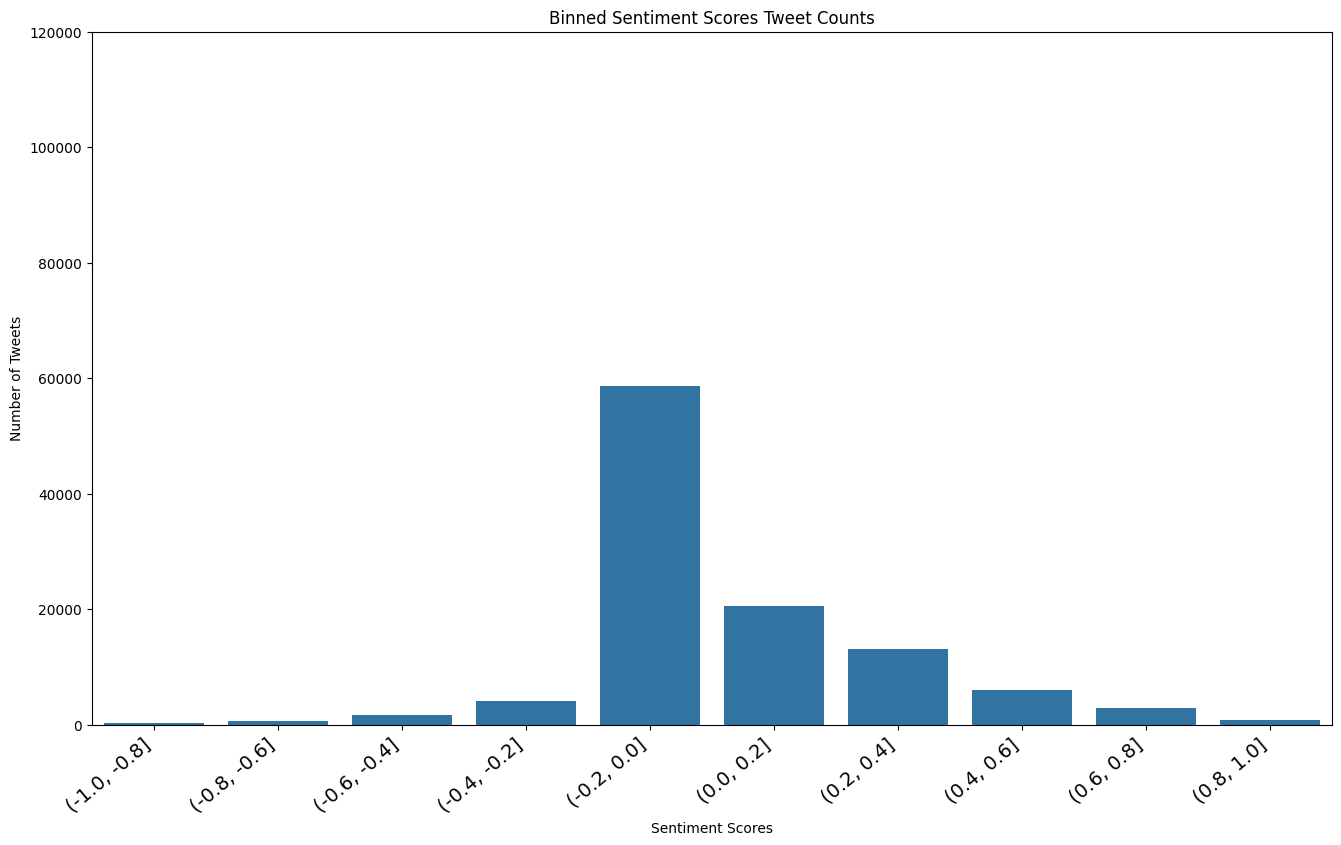

In [5]:
bins = [-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
tweets_df['bin'] = pd.cut(tweets_df['sentiment_score'], bins)

plt.figure(figsize=(16,9))
ax = sns.countplot(x=tweets_df['bin'])
ax.set_ylabel('Number of Tweets')
ax.set_xlabel('Sentiment Scores')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=14)
ax.set_title('Binned Sentiment Scores Tweet Counts')
ax.set_ylim(0, 120000)
plt.show()

In [6]:
daily_sentiment_scores_df = tweets_df[['date', 'sentiment_score']].resample('D', on='date').mean()

C:\Users\gsaik\AppData\Local\Temp\ipykernel_30784\119740577.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


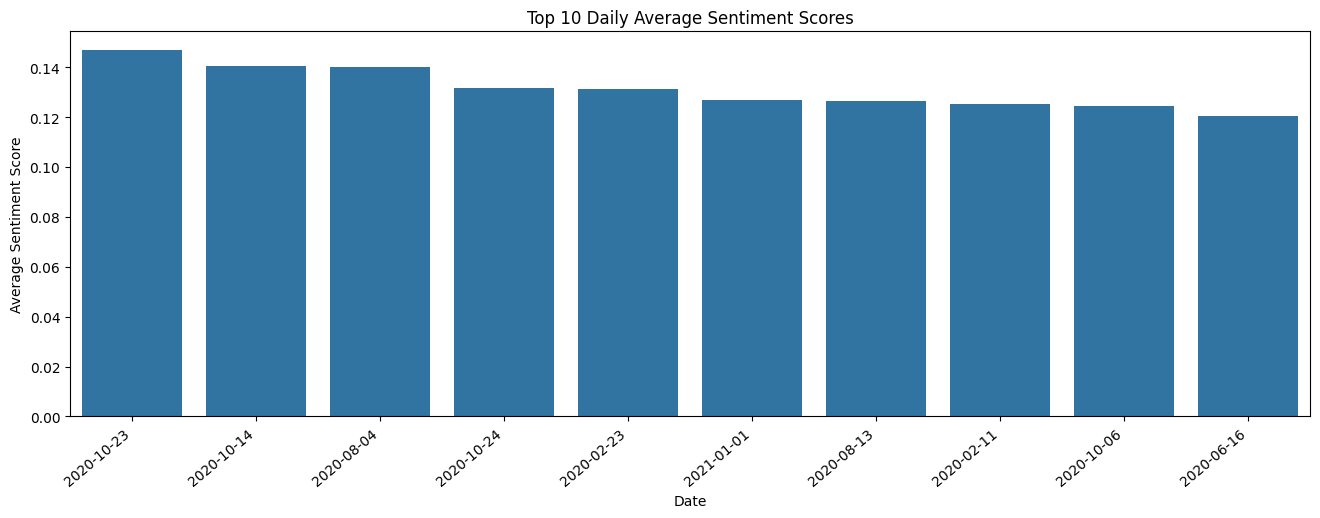

In [7]:
top_avg_df = daily_sentiment_scores_df.nlargest(columns='sentiment_score', n=10)

plt.figure(figsize=(16,5))
ax = sns.barplot(data=top_avg_df, x=top_avg_df.index.date, y=top_avg_df['sentiment_score'])
ax.set_ylabel('Average Sentiment Score')
ax.set_xlabel('Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_title('Top 10 Daily Average Sentiment Scores')
plt.show()

C:\Users\gsaik\AppData\Local\Temp\ipykernel_30784\3896854689.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


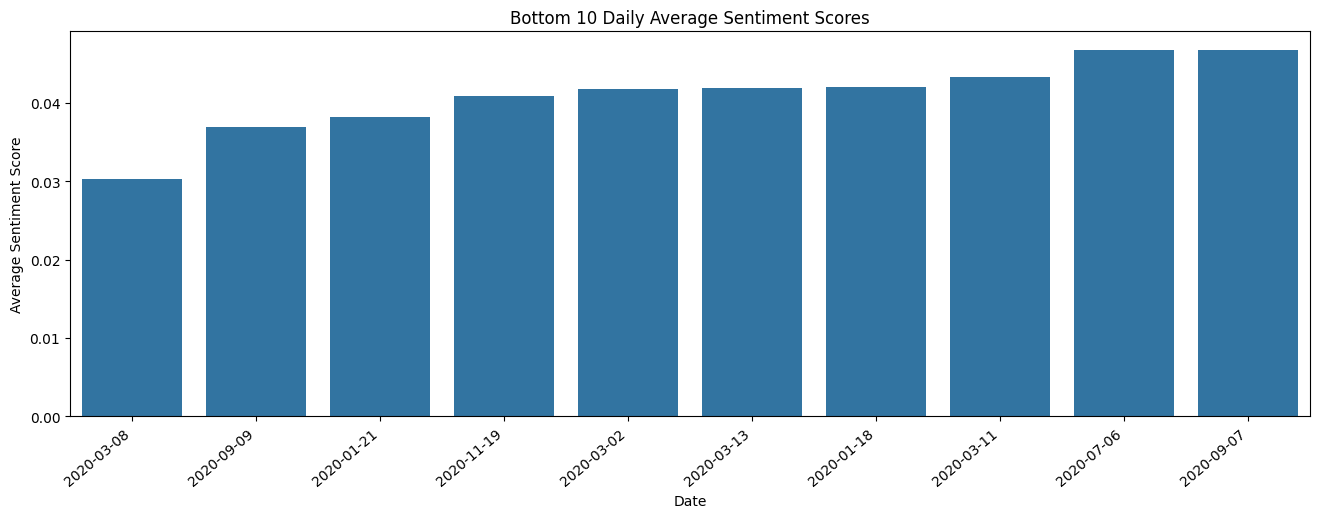

In [8]:
bottom_avg_df = daily_sentiment_scores_df.nsmallest(columns='sentiment_score', n=10)

plt.figure(figsize=(16,5))
ax = sns.barplot(data=bottom_avg_df, x=bottom_avg_df.index.date, y=bottom_avg_df['sentiment_score'])
ax.set_ylabel('Average Sentiment Score')
ax.set_xlabel('Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_title('Bottom 10 Daily Average Sentiment Scores')
plt.show()

In [9]:
tweets_df1 = tweets_df[tweets_df.sentiment_score != 0]
tweets_df1 = tweets_df1.groupby('date', as_index=False)[['sentiment_score']].mean()

In [10]:
daily_sentiment_scores_df['sentiment_score_final'] = tweets_df1.sentiment_score.values
daily_sentiment_scores_df.to_csv('daily-avg-sentiment-scores.csv')